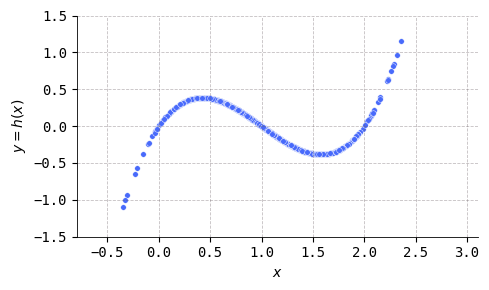

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import math
#import matplotlib_inline.backend_inline
import warnings
plt.style.use('./aux-files/custom_style_light.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')
blue = '#486AFB'
magenta = '#FD46FC'

def h(x):
    return x * (x - 1) * (x - 2)

np.random.seed(42)
linear_grid = sp.stats.norm.rvs(loc=1, scale=0.5, size=1000)
y = h(linear_grid)

sns.scatterplot(x=linear_grid, y=y)
plt.xlabel('$x$')
plt.ylabel('$y=h(x)$')
plt.ylim(-1.5, 1.5)
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()
#plt.savefig('graph.pdf')

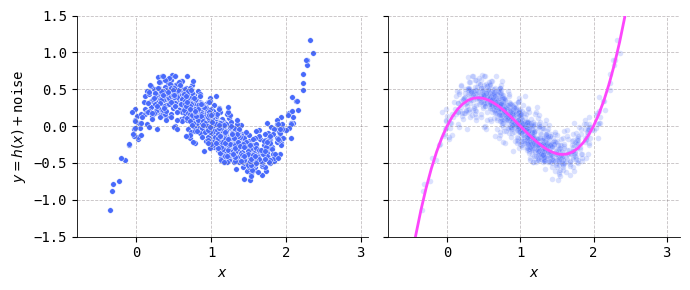

In [2]:
epsilon = sp.stats.norm.rvs(scale=0.15, size=1000)
grid = np.linspace(-0.5, 3)

_, ax = plt.subplots(ncols=2, figsize=(7, 3), sharey=True)

sns.scatterplot(x=linear_grid, y=y + epsilon, ax=ax[0])
ax[0].set_ylim(-1.5, 1.5)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y=h(x) + $noise')

sns.scatterplot(x=linear_grid, y=y + epsilon, alpha=0.2, ax=ax[1])
ax[1].plot(grid, h(grid), color='#FD46FC')
ax[1].set_xlabel('$x$')

plt.tight_layout()
#plt.savefig('graph-pair.pdf')

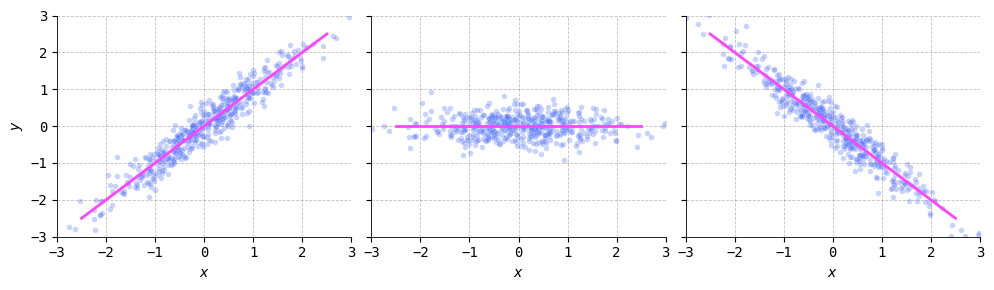

In [3]:
grid = np.linspace(-2.5, 2.5)
epsilon = sp.stats.norm.rvs(scale=0.3, size=500)
m = [1, 0, -1]
linear_grid = sp.stats.norm.rvs(size=500)
_, ax = plt.subplots(ncols=3, figsize=(10, 3), sharey=True, sharex=True)

for i, m in enumerate(m):
    y = m * linear_grid + epsilon
    sns.scatterplot(x=linear_grid, y=y, ax=ax[i], alpha=0.3)
    ax[i].plot(grid, m * grid, color='#FD46FC')
    ax[i].set_xlim(-3, 3)
    ax[i].set_ylim(-3, 3)
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$y$')

plt.tight_layout()
#plt.savefig('lines.pdf')

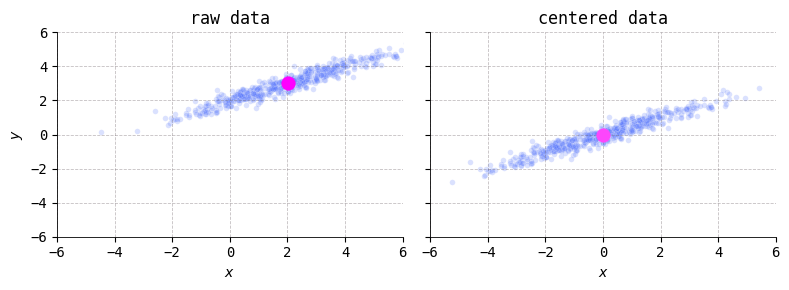

In [4]:
_, axes = plt.subplots(ncols=2, figsize=(8, 3), sharex=True, sharey=True)
np.random.seed(42)
m = 0.5

x = sp.stats.norm.rvs(loc=2, scale=2, size=500)
y = m * x + epsilon + 2
mean = (x.mean(), y.mean())
sns.scatterplot(x=x, y=y, ax=axes[0], alpha=0.2)
axes[0].scatter(mean[0], mean[1], color='magenta', zorder=3, s=100)
axes[0].set_xlim(-6, 6)
axes[0].set_ylim(-6, 6)
axes[0].set_title('raw data')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')

sns.scatterplot(x=x - mean[0], y=y - mean[1], ax=axes[1], alpha=0.2)
axes[1].scatter(0, 0, color=magenta, zorder=3, s=100)
axes[1].set_xlim(-6, 6)
axes[1].set_ylim(-6, 6)
axes[1].set_title('centered data')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
plt.tight_layout()
#plt.savefig('centered.pdf')

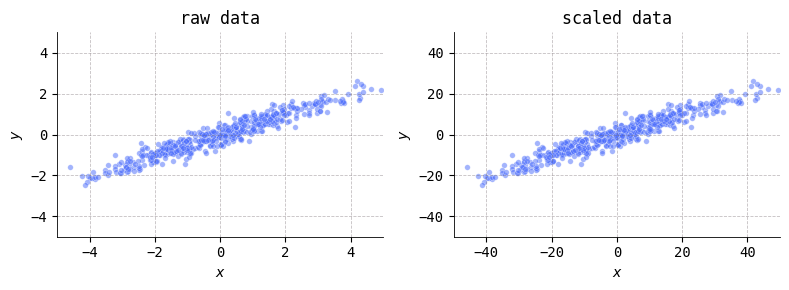

In [5]:
_, axes = plt.subplots(ncols=2, figsize=(8, 3))
np.random.seed(42)
m = 0.5

x = sp.stats.norm.rvs(loc=0, scale=2, size=500)
y = m * x + epsilon
mean = (x.mean(), y.mean())
sns.scatterplot(x=x, y=y, ax=axes[0], alpha=0.5)
axes[0].set_xlim(-5, 5)
axes[0].set_ylim(-5, 5)
axes[0].set_title('raw data')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')

sns.scatterplot(x=10 * x, y=10 * y, ax=axes[1], alpha=0.5)
axes[1].set_xlim(-50, 50)
axes[1].set_ylim(-50, 50)
axes[1].set_title('scaled data')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
plt.tight_layout()
#plt.savefig('scaled.pdf')

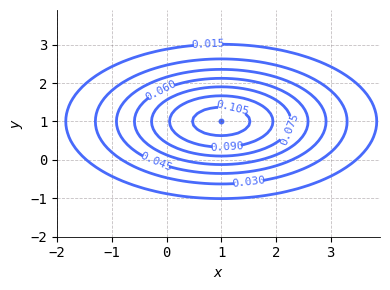

In [6]:
rho = 0.0
sigma1 = math.sqrt(2)
sigma2 = 1
Sigma = np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
mu = np.array([1, 1])
norm = sp.stats.multivariate_normal(mean=mu, cov=Sigma)

x, y = np.mgrid[-2:4:0.1, -2:4:0.1]
grid = np.dstack((x, y))
z = norm.pdf(grid)

contour = plt.contour(x, y, z, colors=blue)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(1, 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=4, h=3)
plt.tight_layout()
#plt.savefig('norm-contours.pdf')

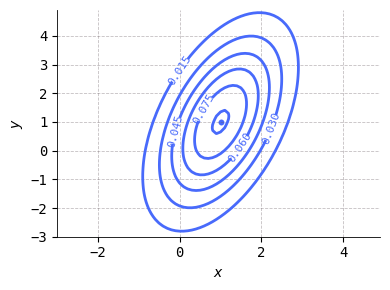

In [7]:
rho = 0.5
sigma1 = 1
sigma2 = 2
Sigma = np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
mu = np.array([1, 1])
norm = sp.stats.multivariate_normal(mean=mu, cov=Sigma)

x, y = np.mgrid[-3:5:0.1, -3:5:0.1]
grid = np.dstack((x, y))
z = norm.pdf(grid)

contour = plt.contour(x, y, z, colors=blue)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(1, 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=4, h=3)
plt.tight_layout()
#plt.savefig('norm-contours-02.pdf')

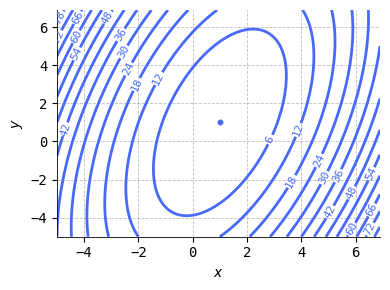

In [8]:
def mahalanobis(x, mean, cov):
    return np.sum(np.matmul(x - mean, np.linalg.inv(cov)) * (x - mean), axis=-1)

x, y = np.mgrid[-5:7:0.1, -5:7:0.1]
grid = np.dstack((x, y))
z = mahalanobis(x=grid, mean=mu, cov=Sigma)

contour = plt.contour(x, y, z, colors=blue, levels=15)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(1, 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=4, h=3)
plt.tight_layout()
#plt.savefig('mah.pdf')

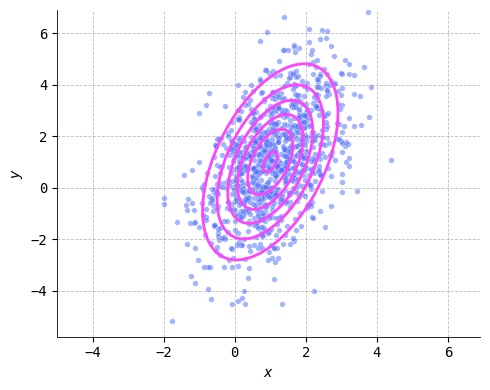

In [10]:
rho = 0.5
sigma1 = 1
sigma2 = 2
Sigma = np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
mu = np.array([1, 1])
norm = sp.stats.multivariate_normal(mean=mu, cov=Sigma)

np.random.seed(42)
sample = norm.rvs(size=1000)

x, y = np.mgrid[-5:7:0.1, -5:7:0.1]
grid = np.dstack((x, y))
z = norm.pdf(grid)

sns.scatterplot(x=sample[:, 0], y=sample[:, 1], alpha=0.5)
plt.contour(x, y, z, colors=magenta, alpha=1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()
#plt.savefig('scatter.pdf')

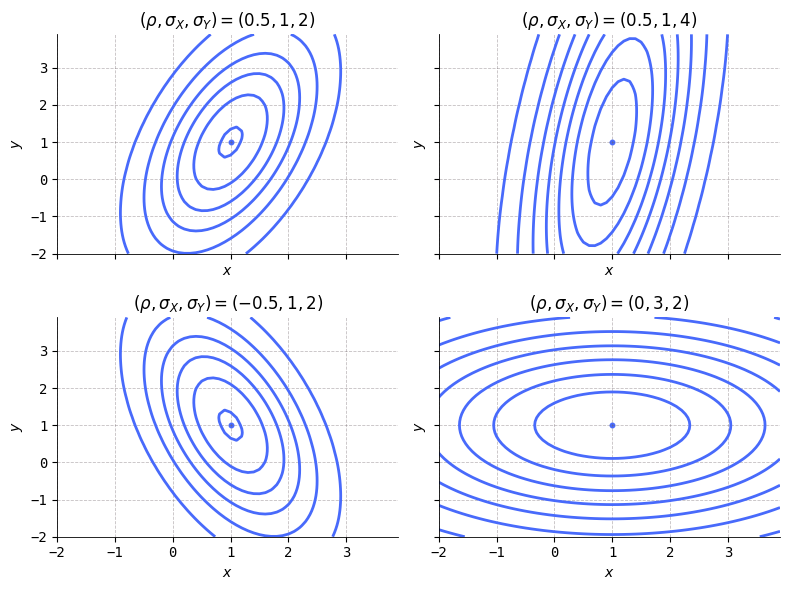

In [9]:
def covar_matrix(rho, sigma1, sigma2):
    return np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])

parameters = [[0.5, 1, 2], [0.5, 1, 4], [-0.5, 1, 2], [0, 3, 2]]   # rho, sigma1, sigma2

x, y = np.mgrid[-2:4:0.1, -2:4:0.1]
grid = np.dstack((x, y))

_, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 6), sharex=True, sharey=True)

for parameter, axis in zip(parameters, axes.flatten()):
    Sigma = covar_matrix(*parameter)
    rho, sigma1, sigma2 = parameter
    norm = sp.stats.multivariate_normal(mean=np.array([1, 1]), cov=Sigma)

    z = norm.pdf(grid)
    axis.contour(x, y, z, colors=blue)
    axis.scatter(1, 1)
    axis.set_xlabel('$x$')
    axis.set_ylabel('$y$')
    axis.set_title(f'$(\\rho,\\sigma_X,\\sigma_Y)=({rho},{sigma1},{sigma2})$')
plt.tight_layout()
#plt.savefig('norm-contours-03.pdf')

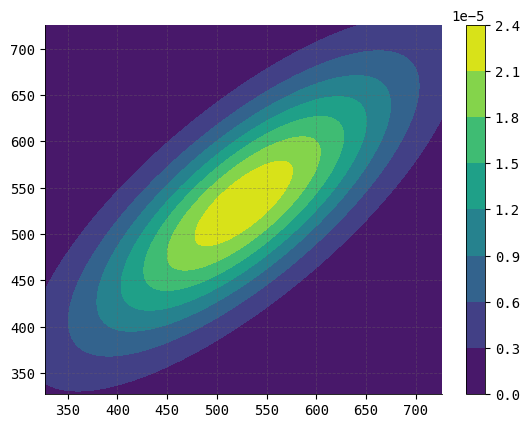

In [11]:
mu = np.array([527, 533])
sigmaX = 107
sigmaY = 100
rho = 0.77
Sigma = np.array([[sigmaX ** 2, rho * sigmaX * sigmaY], [rho * sigmaX * sigmaY, sigmaY ** 2]])
norm = sp.stats.multivariate_normal(mean=mu, cov=Sigma)

left = mu[0] - 200
right = mu[0] + 200
bottom = mu[1] - 200
top = mu[1] + 200

x, y = np.mgrid[left:right, left:right]
grid = np.dstack((x, y))
z = norm.pdf(grid)

contour =  plt.contourf(x, y, z)
color = plt.colorbar(contour)
plt.show()

In [12]:
import math

Z = sp.stats.norm(loc=mu[0] + mu[1], scale=math.sqrt(sigmaX ** 2 + sigmaY ** 2 + 2 * rho * sigmaX * sigmaY))
1 - Z.cdf(1250)

0.16462715074558765